In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns


,SITE,SUB_ID,DIAGNOSIS,AGE,SEX,FIQ,MRI_PATH,LABEL,DIAGNOSIS_LABEL
count,93,93.000000,93.000000,93.000000,93.000000,93.000000,93,93.000000,93
unique,3,NaN,NaN,NaN,NaN,NaN,93,NaN,2
top,NYU,NaN,NaN,NaN,NaN,NaN,E:\Msc_Proj\ABIDEII-NYU_1\ABIDEII-NYU_1\29228\...,NaN,ASD
freq,56,NaN,NaN,NaN,NaN,NaN,1,NaN,62
mean,NaN,29306.763441,1.333333,9.405759,1.118280,108.129032,NaN,0.666667,NaN
std,NaN,216.778508,0.473960,3.853425,0.324689,16.876937,NaN,0.473960,NaN
min,NaN,29150.000000,1.000000,5.128000,1.000000,74.000000,NaN,0.000000,NaN
25%,NaN,29186.000000,1.000000,7.169000,1.000000,94.000000,NaN,0.000000,NaN
50%,NaN,29214.000000,1.000000,8.330000,1.000000,108.000000,NaN,1.000000,NaN
75%,NaN,29246.000000,2.000000,10.680000,1.000000,120.000000,NaN,1.000000,NaN


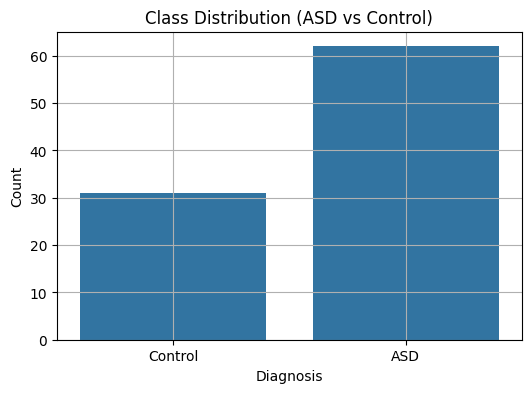

In [ ]:

# Load  cleaned dataset
df = pd.read_csv("E:/Msc_Proj/abide_train_cleaned.csv") 

# Map labels for readability
df['DIAGNOSIS_LABEL'] = df['LABEL'].map({1: 'ASD', 0: 'Control'})

# Summary statistics
display(df.describe(include='all'))

# 1. Diagnosis Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='DIAGNOSIS_LABEL', data=df)
plt.title('Class Distribution (ASD vs Control)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.grid(True)
plt.show()


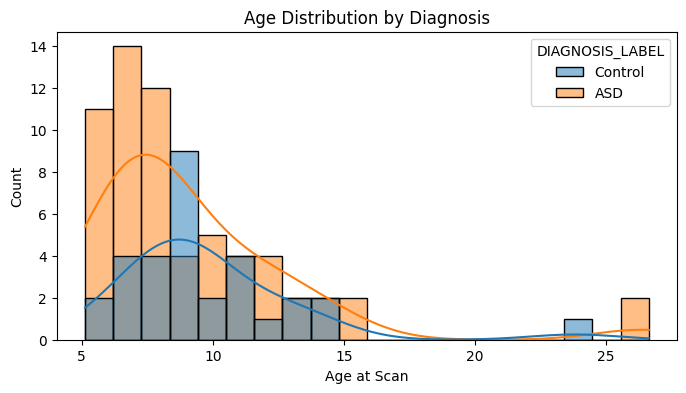

In [3]:

# 2. Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='AGE', hue='DIAGNOSIS_LABEL', kde=True, bins=20)
plt.title('Age Distribution by Diagnosis')
plt.xlabel('Age at Scan')
plt.show()


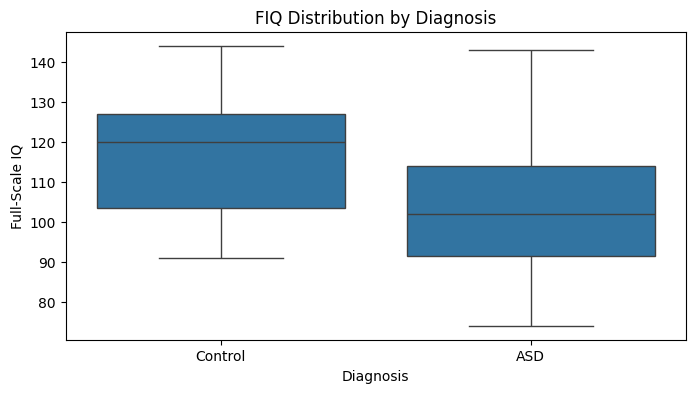

In [4]:

# 3. FIQ Distribution
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='DIAGNOSIS_LABEL', y='FIQ')
plt.title('FIQ Distribution by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Full-Scale IQ')
plt.show()


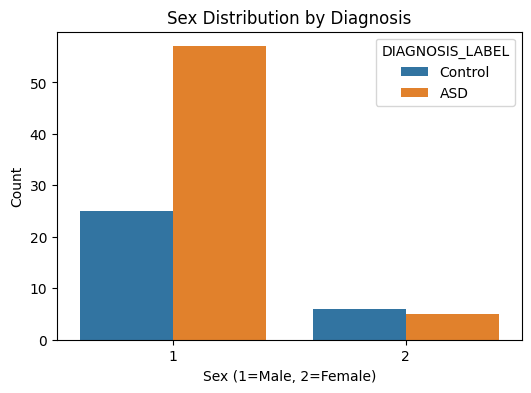

In [5]:

# 4. Sex Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='SEX', hue='DIAGNOSIS_LABEL', data=df)
plt.title('Sex Distribution by Diagnosis')
plt.xlabel('Sex (1=Male, 2=Female)')
plt.ylabel('Count')
plt.show()


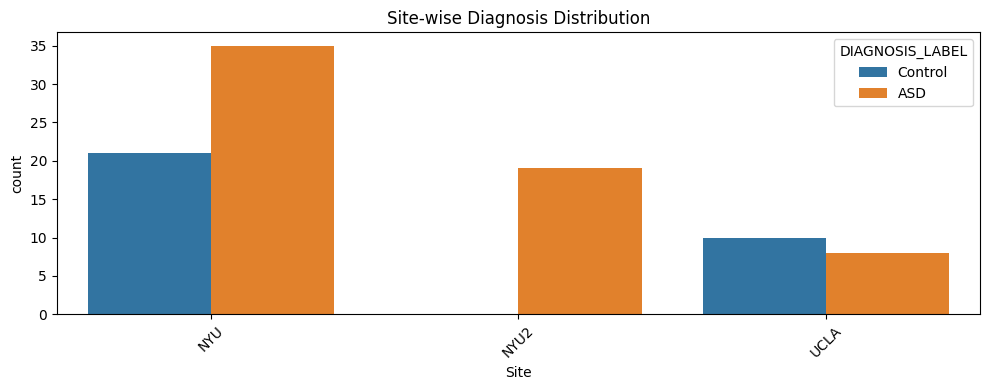

In [6]:
# 5. Site Distribution
plt.figure(figsize=(10, 4))
sns.countplot(x='SITE', hue='DIAGNOSIS_LABEL', data=df)
plt.title('Site-wise Diagnosis Distribution')
plt.xlabel('Site')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:

# 6. Pairplot 
# sns.pairplot(df[['AGE', 'FIQ', 'LABEL']], hue='LABEL')


In [8]:


# 7. Missing Values
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0])


Missing values per column:
Series([], dtype: int64)


In [15]:
# Ensure these columns are present
feature_cols = ['AGE', 'FIQ', 'SEX']  # Add more if needed and if numeric
target_col = 'LABEL'

# Drop rows with missing values in selected features
df_clean = df.dropna(subset=feature_cols + [target_col])

# Define features and labels
x_features = df_clean[feature_cols].values
y_labels = df_clean[target_col].values

# 1. Dimensionality check
print(" Data dimensions:", x_features.shape)
print(" Label shape:", y_labels.shape)

 Data dimensions: (93, 3)
 Label shape: (93,)


Label distribution: {np.int64(0): np.int64(31), np.int64(1): np.int64(62)}


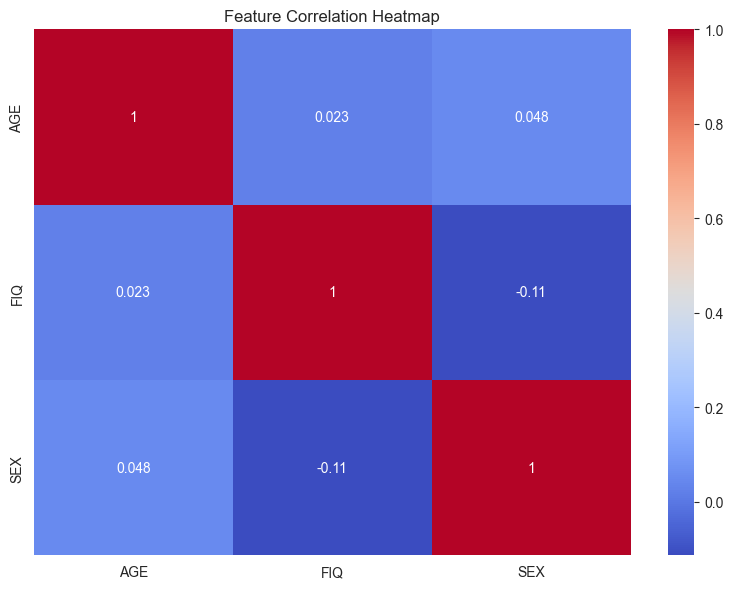

In [16]:
# 2. Check for class imbalance
unique, counts = np.unique(y_labels, return_counts=True)
print("Label distribution:", dict(zip(unique, counts)))

# 3. Correlation heatmap (for interpretable features)
plt.figure(figsize=(8, 6))
corr_matrix = df_clean[feature_cols].corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

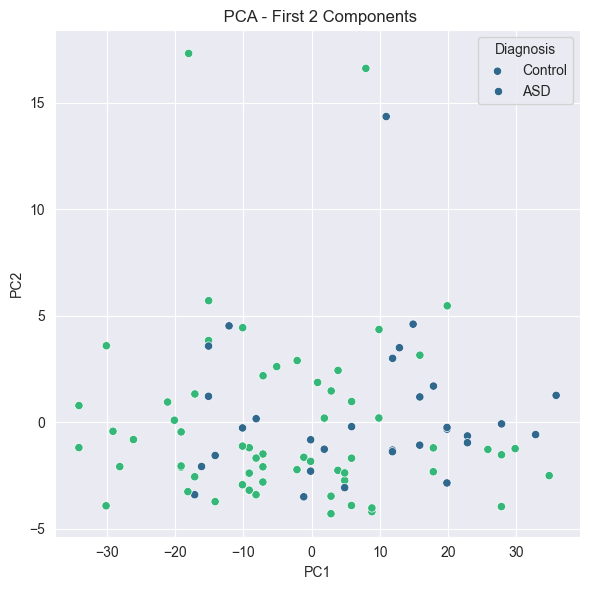

In [18]:
if x_features.shape[1] >= 2:
    pca = PCA(n_components=2)
    x_pca = pca.fit_transform(x_features)

    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y_labels, palette="viridis")
    plt.title(" PCA - First 2 Components")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(title="Diagnosis", labels=["Control", "ASD"])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Type of image object: <class 'nibabel.nifti1.Nifti1Image'>
 Image shape (D x H x W): (160, 240, 256)
 Value range: [0.0, 903.0]
 Image Header:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  3 160 240 256   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.   1.2  1.   1.   0.   0.   0.   0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'')
aux_file        : np.bytes_(b'')
qform_code      : scanne

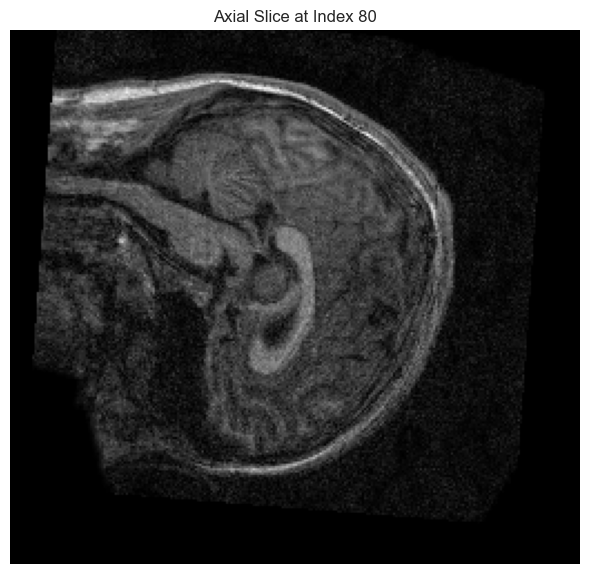

In [12]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Display settings
%matplotlib inline
sns.set_style('darkgrid')

# Define path to the MRI scan (change this path to your target file)
image_path = r'E:\Msc_Proj\ABIDEII-UCLA_1\ABIDEII-UCLA_1\29728\session_1\anat_1\anat.nii.gz'

# Check file existence
if not os.path.exists(image_path):
    print(f"File not found: {image_path}")
else:
    # Load the NIfTI file
    image_obj = nib.load(image_path)
    image_data = image_obj.get_fdata()

    # Output basic information
    print(f"Type of image object: {type(image_obj)}")
    print(f" Image shape (D x H x W): {image_data.shape}")
    print(f" Value range: [{image_data.min()}, {image_data.max()}]")
    print(" Image Header:")
    print(image_obj.header)

    # Visualize a central axial slice
    slice_index = image_data.shape[0] // 2  # Middle slice
    plt.figure(figsize=(6, 6))
    plt.imshow(image_data[slice_index, :, :], cmap='gray')
    plt.axis('off')       # Remove axes
    plt.xticks([])        # Remove x ticks
    plt.yticks([])        # Remove y ticks
    plt.title(f"Axial Slice at Index {slice_index}")
    plt.tight_layout()

    # Optional scatter overlay (if 'center' variable is defined)
    try:
        plt.scatter(center[:10, 1], center[:10, 2] - 10, s=50, c="r")  # Adjust as needed
    except NameError:
        pass  # 'center' not defined, skip scatter plot

    # Save image
    plt.show()
